In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import math
import sklearn.datasets 
from sklearn.utils import shuffle
from random import randint
from numpy import random
import matplotlib 
%matplotlib inline

def split_train_test(X, y):
    datasize = X.shape[0]
    X, y= shuffle(X, y, random_state = randint(0, 100))
    train_X = X[:int(datasize*80/100)]
    train_y = y[:int(datasize*80/100)]
    test_X = X[int(datasize*80/100):]
    test_y = y[int(datasize*80/100):]
    return [train_X, train_y, test_X, test_y]


In [4]:

class NeuNet():
    
    def __init__(self, nn_inputs, nn_layers, nn_hidden, nn_outputs, learning_rate):
        self.nn_inputs = nn_inputs
        self.nn_layers = nn_layers
        self.neurons_per_layer = [nn_inputs] + nn_hidden + [nn_outputs]
        self.nn_outputs = nn_outputs
        self.eta = learning_rate
        
        self.W=[]
        self.b=[]
        self.a=[]
        self.h=[]
        self.delta=[]   
        self.yhat=[]
        
        for i in range(self.nn_layers+1):
            self.W.append(np.random.normal(0,1,(self.neurons_per_layer[i+1], self.neurons_per_layer[i])))
            self.b.append(np.random.normal(0,1,(self.neurons_per_layer[i+1],1)))
            self.a.append(np.zeros((self.neurons_per_layer[i],1)))
            self.h.append(np.zeros((self.neurons_per_layer[i],1)))
            self.delta.append(np.zeros((self.neurons_per_layer[i],1)))
            
        self.a.append(np.zeros((self.neurons_per_layer[nn_layers+1],1)))
        self.h.append(np.zeros((self.neurons_per_layer[nn_layers+1],1)))
        self.delta.append(np.zeros((self.neurons_per_layer[nn_layers+1],1)))
                  
        print("network:",self.neurons_per_layer)
        print("W", [x.shape for x in self.W])
        print("b", [x.shape for x in self.b])
        print("a", [x.shape for x in self.a])
        print("h", [x.shape for x in self.h])
        print("delta", [x.shape for x in self.delta])
    

    def sigmoid(self, x): return 1/(1 + np.exp(-x))
    def sigmoid_der(self, x): return np.exp(-x)/(1 + np.exp(-x))**2
    
    def get_error(self, y):
        return np.sum(( yi - yihat) **2 for yi, yihat in zip( y, self.yhat))
    
    
    def forward_prop(self, data_X):
        
        self.yhat = np.empty([len(data_X),1])
        
        for j, X in enumerate( data_X):
            X.shape=(len(X),1)
            self.a[0] = X
            self.h[0] = X
            
            for i in range(1,self.nn_layers+2):
                self.a[i] = self.W[i-1].dot( self.h[i-1]) + self.b[i-1]
                self.h[i] = self.sigmoid( self.a[i])
            
            self.yhat[j] =  self.h[-1]
            
        
    def backward_prop(self, data_y):
        
        for k, y in enumerate( data_y):
            self.delta[-1] = np.array([y - self.yhat[k]])
    
            for i in range(self.nn_layers,0,-1):
                self.delta[i] = np.dot( self.W[i].T, self.delta[i+1]) * self.sigmoid_der( self.a[i])

                for j, delta in enumerate(self.delta[i+1]):
                    self.W[i][j] -= self.eta * delta * self.h[i][j]
                self.b[i] -= self.eta * self.delta[i+1]


network: [10, 5, 2, 1]
W [(5, 10), (2, 5), (1, 2)]
b [(5, 1), (2, 1), (1, 1)]
a [(10, 1), (5, 1), (2, 1), (1, 1)]
h [(10, 1), (5, 1), (2, 1), (1, 1)]
delta [(10, 1), (5, 1), (2, 1), (1, 1)]
datasets: (442, 10) (442,)
[ 32.92128738]
[ 147.06119894]
[ 148.83896701]
[ 145.87145893]
[ 146.74810027]
[ 145.87145893]
[ 151.93981037]
[ 148.44106715]
[ 149.40790559]
[ 148.44106715]


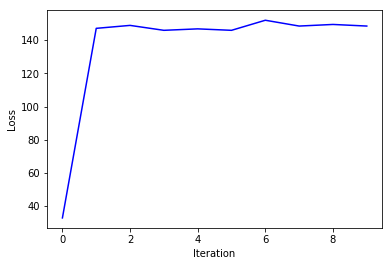

In [5]:
no_runs = 10
neunet = NeuNet(nn_inputs = 10, nn_layers = 2, nn_hidden = [5,2], nn_outputs = 1, learning_rate = 1)

def normalize(X):
    m = np.amin(X, axis=0)
    M = np.amax(X, axis=0)
    return np.array([(x-m)/(M-m) for x in X])

dataset = sklearn.datasets.load_diabetes()
_dataset_X = dataset['data']
_dataset_y = dataset['target']
dataset_X = np.array(_dataset_X)
dataset_y = np.array(_dataset_y)
    
print("datasets:",dataset_X.shape, dataset_y.shape)

dataset_y = normalize(dataset_y)
train_err = []
test_err = []

for it in range(no_runs):
    train_X, train_y, test_X, test_y = split_train_test(dataset_X, dataset_y)

    neunet.forward_prop(train_X)
    neunet.backward_prop(train_y)
    
    if it%1==0:
        train_err.append(neunet.get_error(train_y))
        print(train_err[-1])
    

plt.plot(train_err, color = 'b')
# plt.plot(test_err, color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Loss')